### Задание 1
Импортируйте библиотеки pandas, numpy и matplotlib.
Загрузите "Boston House Prices dataset" из встроенных наборов данных библиотеки sklearn.
Создайте датафреймы X и y из этих данных.
Разбейте эти датафреймы на тренировочные (X_train, y_train) и тестовые (X_test, y_test)
с помощью функции train_test_split так, чтобы размер тестовой выборки
составлял 20% от всех данных, при этом аргумент random_state должен быть равен 42.

In [27]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler

from sklearn.manifold import TSNE

from sklearn.cluster import KMeans

In [41]:
data = load_boston()
X, Y, features = pd.DataFrame(data['data'], columns=data['feature_names']), data['target'], data['feature_names']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
data['feature_names']

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

Масштабируйте данные с помощью StandardScaler.

In [21]:
std_scaler = StandardScaler()

X_train_scaled = pd.DataFrame(std_scaler.fit_transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(std_scaler.transform(X_test), columns=X_test.columns)

Постройте модель TSNE на тренировочный данных с параметрами:
n_components=2, learning_rate=250, random_state=42.

In [23]:
tsne = TSNE(n_components=2, learning_rate=150, random_state=42)

X_train_tsne = tsne.fit_transform(X_train_scaled)

print('До:\t{}'.format(X_train_scaled.shape))
print('После:\t{}'.format(X_train_tsne.shape))

До:	(404, 13)
После:	(404, 2)


Постройте диаграмму рассеяния на этих данных.

fig, ax = plt.subplots()

ax.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1])

plt.show()

### Задание 2
С помощью KMeans разбейте данные из тренировочного набора на 3 кластера,
используйте все признаки из датафрейма X_train.
Параметр max_iter должен быть равен 100, random_state сделайте равным 42.

In [28]:
kmeans = KMeans(n_clusters=3, max_iter=100, random_state=42)

labels_train = kmeans.fit_predict(X_train_scaled)

Постройте еще раз диаграмму рассеяния на данных, полученных с помощью TSNE,
и раскрасьте точки из разных кластеров разными цветами.

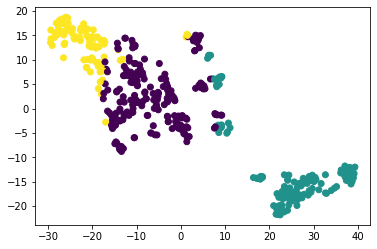

In [31]:
fig, ax = plt.subplots()

ax.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], c=labels_train)

plt.show()

Вычислите средние значения price и CRIM в разных кластерах.

In [55]:
for i in range(3):
    print(f'====== {i}-й кластер ======')
    print(f'среднее значение price: {Y_train[labels_train == i].mean()}')
    print(' среднее значение CRIM: {}'.format(X_train.loc[labels_train == i, 'CRIM'].mean()))

====== 0-й кластер ======
среднее значение price: 24.958115183246072
 среднее значение CRIM: 0.42166020942408367
====== 1-й кластер ======
среднее значение price: 16.165354330708663
 среднее значение CRIM: 10.797028425196853
====== 2-й кластер ======
среднее значение price: 27.78837209302326
 среднее значение CRIM: 0.07356558139534886


### Задание 3
Примените модель KMeans, построенную в предыдущем задании, к данным из тестового набора.

In [56]:
labels_test = kmeans.fit_predict(X_test)

Вычислите средние значения price и CRIM в разных кластерах на тестовых данных.

In [57]:
for i in range(3):
    print(f'====== {i}-й кластер ======')
    print(f'среднее значение price: {Y_test[labels_test == i].mean()}')
    print(' среднее значение CRIM: {}'.format(X_test.loc[labels_test == i, 'CRIM'].mean()))

====== 0-й кластер ======
среднее значение price: 12.814285714285713
 среднее значение CRIM: 19.021665714285714
====== 1-й кластер ======
среднее значение price: 23.91159420289855
 среднее значение CRIM: 0.2464211594202899
====== 2-й кластер ======
среднее значение price: 17.392307692307693
 среднее значение CRIM: 8.469301923076923
